<a href="https://colab.research.google.com/github/Vijay06111998/Customer_Behavior_Modeling/blob/main/Customer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E-commerce data EDA for Customer Behavior Analysis

EDA (Exploratory Data Analysis) of E-Commerce data will help us understand the data and think of ways to use it to understand the customer behavior.

## 1. Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [ ]:
# Update URL to point to raw CSV data on GitHub
URL = 'https://raw.githubusercontent.com/Kanchan786786/Marketing_Analytics/main/Customer_Behavior_Data(1).csv'

# Load the CSV file with semicolon delimiter
df = pd.read_csv(URL, delimiter=';')
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Display the first few rows of the dataframe
df.head()

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [ ]:
df.shape

(3333, 20)

## EDA

With every new dataset we need to got through an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs. It is always a good idea to:

- Understand what our columns say
- Rename columns labels and make them lowercase
- Make sure that the data types of columns are correct
- Handle missing values
- Check for duplicates
- Search for outliers
- Check for linearity between variables

To achieve this we can take advantage of Pandas and visualisation libraries

In [ ]:
#CHeck for missing values
df.isnull().sum()


account_length                         0
location_code                          0
user_id                                0
credit_card_info_save                  0
push_status                            0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
avg_order_value                        0
sale_product_views                     0
discount_rate_per_visited_products     0
product_detail_view_per_app_session    0
app_transactions                       0
add_to_cart_per_session                0
customer_service_calls                 0
churn                                  0
dtype: int64

In [ ]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account_length                       3333 non-null   int64 
 1   location_code                        3333 non-null   int64 
 2   user_id                              3333 non-null   int64 
 3   credit_card_info_save                3333 non-null   object
 4   push_status                          3333 non-null   object
 5   add_to_wishlist                      3333 non-null   int64 
 6   desktop_sessions                     3333 non-null   int64 
 7   app_sessions                         3333 non-null   int64 
 8   desktop_transactions                 3333 non-null   int64 
 9   total_product_detail_views           3333 non-null   int64 
 10  session_duration                     3333 non-null   int64 
 11  promotion_clicks                     3333 n

In [ ]:
# Create a duplicate of the DataFrame
df_copy = df.copy()


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account_length                       3333 non-null   int64 
 1   location_code                        3333 non-null   int64 
 2   user_id                              3333 non-null   int64 
 3   credit_card_info_save                3333 non-null   object
 4   push_status                          3333 non-null   object
 5   add_to_wishlist                      3333 non-null   int64 
 6   desktop_sessions                     3333 non-null   int64 
 7   app_sessions                         3333 non-null   int64 
 8   desktop_transactions                 3333 non-null   int64 
 9   total_product_detail_views           3333 non-null   int64 
 10  session_duration                     3333 non-null   int64 
 11  promotion_clicks                     3333 n

In [ ]:
# Handling the data for correct formating
df_copy['location_code'] = df_copy['location_code'].astype(object)
columns_to_process = ['add_to_cart_per_session', 'discount_rate_per_visited_products',
                      'product_detail_view_per_app_session', 'avg_order_value']

# Remove commas and convert to numeric
for column in columns_to_process:
    # Remove commas from the values and convert to numeric
    df_copy[column] = df_copy[column].str.replace(',', '.').astype(float)

# Display the data types after processing
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   object 
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   object 
 4   push_status                          3333 non-null   object 
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

## Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [ ]:
df_copy.describe()

,account_length,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## 3. Handle Missing Values

Missing values can be an issue with most real-life datasets. We can use the .info() function, there are no missing values. For the sake of double checking and to show a way of checking whether the dataset has missing values, let's write some code below

We dont thave the any missing value in this dataset so we donot have to handle this here

## 4. Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [ ]:
print("The number of duplicate values are",df_copy.duplicated().sum())

The number of duplicate values are 0


### 5. Search for outliers

- Outliers are data points at the extreme points of a dataset.
- Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
    - Because of this, we need to be careful when we cleanse our data
    - If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
    - If the outliers are errors we should generally remove those data points
    
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use:
- Visualisations such as histograms and blox plots
- Use interquartiles with rules such as:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

To identify possible outliers in the dataset, we can look at the numerical columns, as categorical columns (like credit_card_info_save, push_status, and churn) do not have outlier values in the traditional sense

In [ ]:
columns_with_outliers = ['account_length', 'location_code', 'user_id', 'add_to_wishlist',
           'desktop_sessions', 'app_sessions', 'desktop_transactions',
           'total_product_detail_views', 'session_duration', 'promotion_clicks',
           'avg_order_value', 'sale_product_views', 'discount_rate_per_visited_products',
           'product_detail_view_per_app_session', 'app_transactions',
           'add_to_cart_per_session', 'customer_service_calls', 'churn']

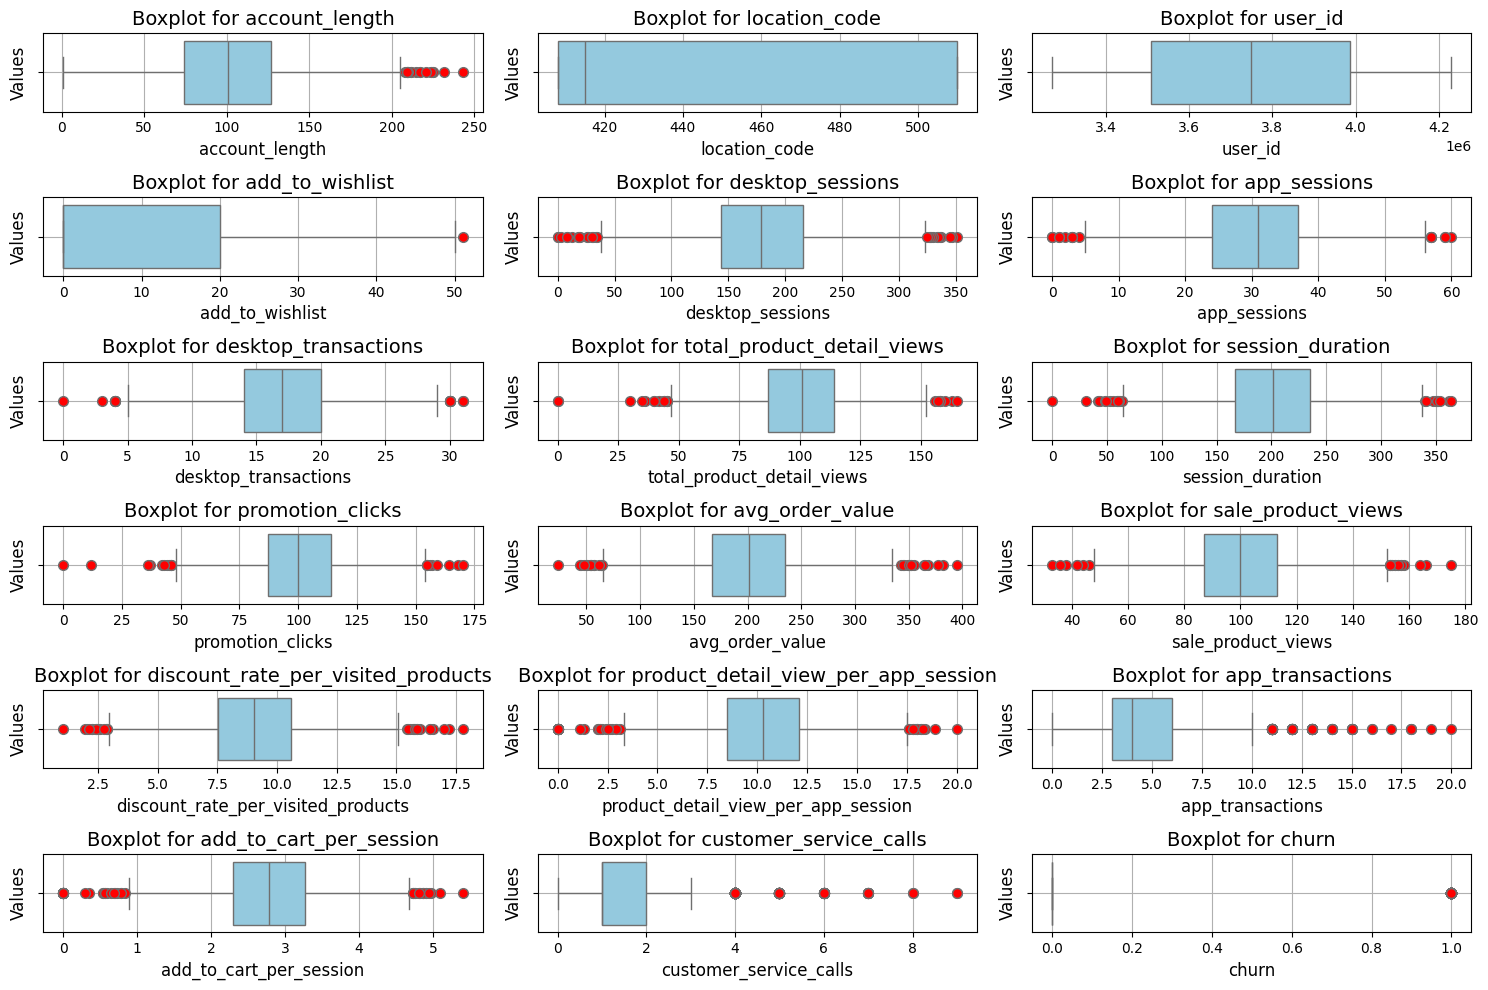

In [ ]:
# Number of columns for the subplot
num_cols = 3

# Create the figure with subplots
fig, axes = plt.subplots(nrows=len(columns_with_outliers) // num_cols + (len(columns_with_outliers) % num_cols > 0), ncols=num_cols, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the columns and create boxplots and histograms
for i, column in enumerate(columns_with_outliers):
    # Boxplot for outlier detection
    sns.boxplot(ax=axes[i], x=df_copy[column], color='skyblue', fliersize=5,
                flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 7, 'linestyle': 'none'})
    axes[i].set_title(f'Boxplot for {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Values', fontsize=12)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
columns=columns_to_process

In [ ]:
# Function to calculate and display outliers using IQR method
def find_outliers(df_copy, column):
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)]

    # Get the count of outliers and total percentage of outliers
    num_outliers = outliers.shape[0]
    total_count = df_copy.shape[0]
    percentage_outliers = (num_outliers / total_count) * 100

    # Display the summary
    print(f"Outliers for '{column}':")
    print(f"Number of outliers: {num_outliers}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%")

    # Display the specific outlier values (first few rows)
    if not outliers.empty:
        print(f"Outlier values (showing up to 5): \n{outliers[column].head(5)}")
    else:
        print(f"No outliers found for {column}.")
    print('-' * 50)

# Loop through columns in df_copy and find outliers
for column in columns:
    find_outliers(df_copy, column)

Outliers for 'add_to_cart_per_session':
Number of outliers: 49
Percentage of outliers: 1.47%
Outlier values (showing up to 5): 
115    5.40
179    0.00
214    4.75
225    0.73
314    5.10
Name: add_to_cart_per_session, dtype: float64
--------------------------------------------------
Outliers for 'discount_rate_per_visited_products':
Number of outliers: 30
Percentage of outliers: 0.90%
Outlier values (showing up to 5): 
116     2.59
244    15.97
444    15.71
862    15.56
883     2.03
Name: discount_rate_per_visited_products, dtype: float64
--------------------------------------------------
Outliers for 'product_detail_view_per_app_session':
Number of outliers: 46
Percentage of outliers: 1.38%
Outlier values (showing up to 5): 
115    20.0
179     0.0
214    17.6
225     2.7
314    18.9
Name: product_detail_view_per_app_session, dtype: float64
--------------------------------------------------
Outliers for 'avg_order_value':
Number of outliers: 30
Percentage of outliers: 0.90%
Outlier v

### 6. Repeat with the rest of the variables

In this data all the outliers identified are true outliers so we must not remove them from the dataset

### 7. Conclusions based on visualisations

All numerical variables in the dataset exhibit outliers, reflecting natural variations typical in e-commerce, and these outliers are deemed "True outliers" rather than data errors. This aligns with expected behavior in customer interactions, suggesting that such variations are normal. While standard statistical techniques, such as removing points outside the IQR bounds, could be applied if outliers were suspected to be errors, the nature of these outliers indicates their retention may be beneficial.

Ultimately, keeping these outliers could provide valuable insights into customer behavior and trends.

### 8. Analysis of the Dependent variable (Churn) vs Idependent variables

Until now we've looked into the numeric variables, their missing data, duplicates, distribution, and outliers. A key part of the customer behaviour data is to understand which "behaviours" aka idependent varialbes in our dataset can help us predict customers deciding to stop using the product, aka "churn".

Another variable that we haven't analysed yet is the location code, but we might be able to find value in comparing it with the churn and finding out any potential correlations.

In [ ]:
#Creating new categorical columns:
df_copy["churn_cat"] = df['churn'].apply(lambda x: "churned" if x == 1 else "not churned")

In [ ]:
df_copy.head().T

,0,1,2,3,4
account_length,128,107,137,84,75
location_code,415,415,415,408,415
user_id,3824657,3717191,3581921,3759999,3306626
credit_card_info_save,no,no,no,yes,yes
push_status,yes,yes,no,no,no
add_to_wishlist,25,26,0,0,0
desktop_sessions,265,162,243,299,167
app_sessions,45,27,41,51,28
desktop_transactions,17,17,10,5,13
total_product_detail_views,110,123,114,71,113


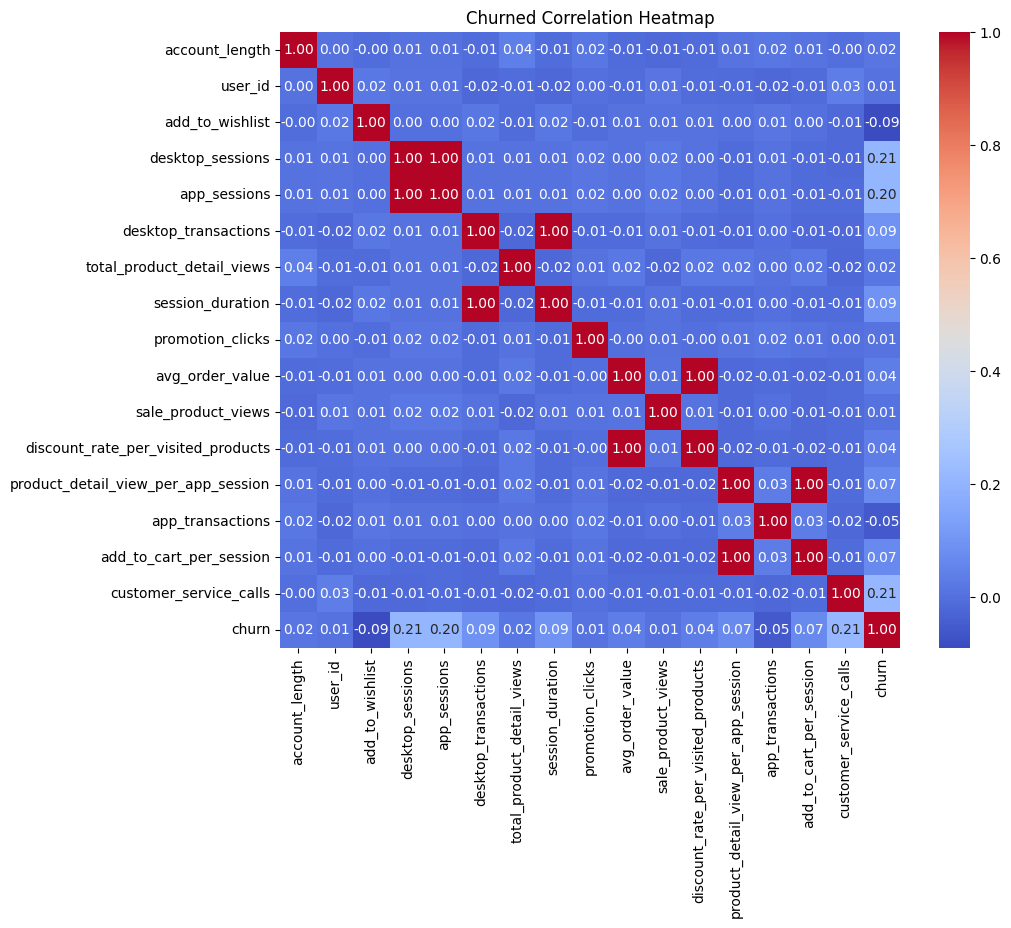

In [ ]:
df_corr = df_copy.select_dtypes(include=['number'])  # Select only numerical columns
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Churned Correlation Heatmap')
plt.show()

### Summary on Correlation Matrix :    
The correlation matrix provides valuable insights into factors influencing customer churn. There's a moderate positive correlation (0.21) between desktop sessions and churn, implying that frequent desktop users may be encountering issues that lead to dissatisfaction. Likewise, app sessions show a similar positive correlation (0.20), indicating that heavy mobile users could be facing frustrations that contribute to churn. While location code does not exhibit a strong correlation with churn, it could still be useful to investigate potential regional differences to uncover any subtle patterns.

This analysis serves as a clear roadmap for identifying key areas where intervention may be most effective in reducing churn rates.

### Visualizing Relationships between target and categorical variables:

<Axes: xlabel='avg_order_value', ylabel='Density'>

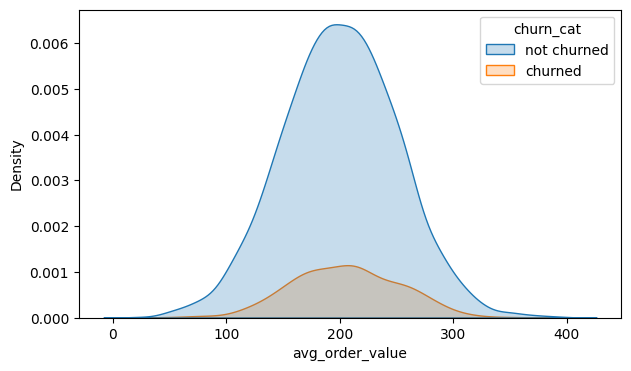

In [ ]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df_copy,x='avg_order_value',hue='churn_cat',fill=True)

The density plot compares the average order value for churned and non-churned customers. The blue-shaded area, representing non-churned customers, peaks higher and is more concentrated around an average order value near 200, indicating that non-churned customers typically have moderate spending levels. In contrast, the churned group, shown in orange, has a flatter and lower peak. the churned customers purchase in between 150 and 200 inconsistently and churn. This may be due to a sudden promotion or a sale.

<Axes: xlabel='discount_rate_per_visited_products', ylabel='Density'>

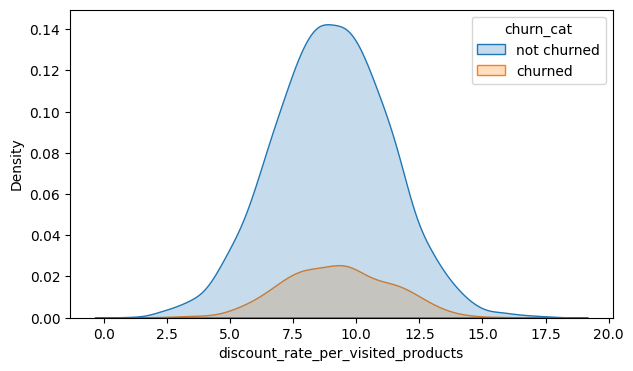

In [ ]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df_copy,x='discount_rate_per_visited_products',hue='churn_cat',fill=True)

<Axes: xlabel='promotion_clicks', ylabel='Density'>

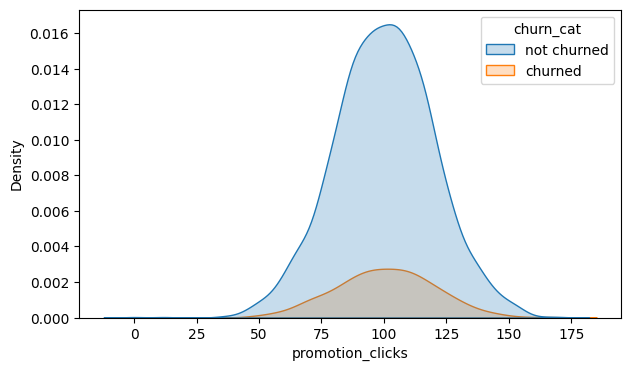

In [ ]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=df_copy,x='promotion_clicks',hue='churn_cat',fill=True)

The charts for discount_rate_per_visited_products and promotion_clicks further strengthens the assumption that the people who churned is more concentraded around more discounts and entered the site through a promotional ads indicating the purchase of a higher order value for churned customers. Rather, consistent discounting strategies around the 8% mark might align better with customer loyalty trends

<Axes: xlabel='avg_order_value', ylabel='discount_rate_per_visited_products'>

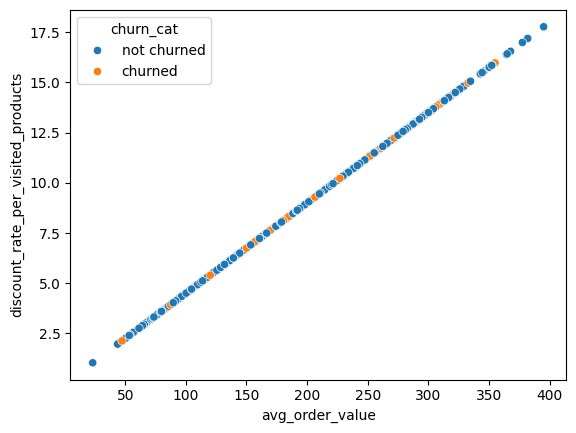

In [ ]:
sns.scatterplot(x='avg_order_value', y='discount_rate_per_visited_products', data=df_copy, hue='churn_cat')

There is a positive correlation between the avg_order_value and discount_rate_visited products where there is a steady increase in the order value with promotions. So maintaing a steady discount around 8% will maintain the order value around 200 which is the ideal value for most customers and can increase sales and profitablity

In [ ]:
df_corr.groupby(by='churn').agg('mean')[['add_to_wishlist', 'desktop_sessions', 'app_sessions']]

,add_to_wishlist,desktop_sessions,app_sessions
churn,,,
0,8.604561,175.213684,29.787018
1,5.115942,206.944099,35.175983


#### Wishlist Engagement:
Non-churned customers have a higher average add_to_wishlist count (8.6) compared to churned customers (5.1). This suggests that customers who add more items to their wishlist are more engaged and likely to return, possibly due to a higher intent to purchase or revisit items of interest.

#### Desktop Usage Patterns:
Churned customers show a higher average desktop_sessions count (206.9) than non-churned customers (175.2). This might indicate that churned users rely more heavily on desktop interactions, possibly due to a preference for longer browsing sessions or shopping on larger screens. However, increased desktop sessions alone do not seem to correlate with retention.

##### App Engagement:
The average app_sessions count is slightly higher for churned customers (35.2) compared to non-churned customers (29.8). This could imply that merely increasing app sessions does not directly contribute to retention. Instead, engagement quality within app sessions, such as relevant recommendations or ease of use, may be more influential in encouraging customers to stay.








# 9. Plot Churn against the categorical data

# 9.1 Observations from the categorical columns plots

- Majority of customers are in location code 415
- Majority of customers don't allow push notifications
- Majority of customers don't store their credit card information on the side

# 9.2 Plot categorical data against the Churn

<Axes: xlabel='count', ylabel='churn_cat'>

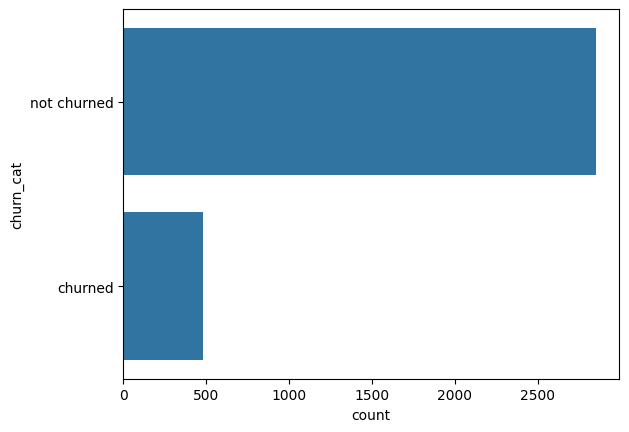

In [ ]:
sns.countplot(df_copy['churn_cat'])

In [ ]:
print(f"The overall churn rate is {(df_copy['churn'].sum() / df_copy.shape[0]) * 100:.2f} %")


The overall churn rate is 14.49 %


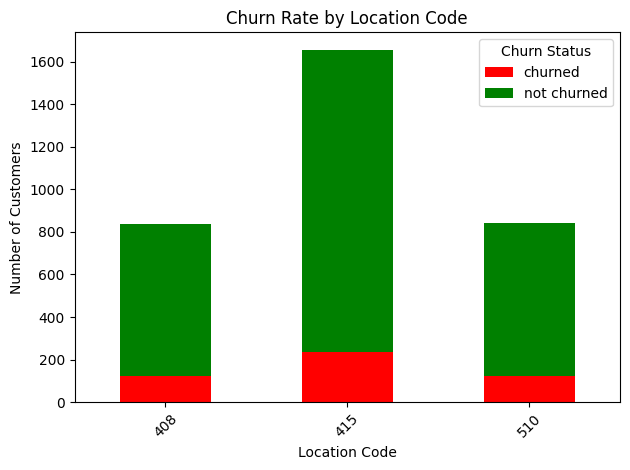

In [ ]:

churn_counts = df_copy.groupby(['location_code', 'churn_cat']).size().unstack()

# Create a bar plot
churn_counts.plot(kind='bar', stacked=True, color=['red', 'green'])

# Customize the plot
plt.title('Churn Rate by Location Code')
plt.ylabel('Number of Customers')
plt.xlabel('Location Code')
plt.xticks(rotation=45)
plt.legend(title='Churn Status')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_copy['location_code'].value_counts()

location_code
415    1655
510     840
408     838
Name: count, dtype: int64

Insight : This bar chart illustrates the churn rate for customers across the three location codes: 408, 415, and 510. The churn rates are relatively consistent across these locations, all hovering around 14%, suggesting that location is not a strong determinant of customer churn. While the location code 415 shows a marginally lower churn rate compared to 408 and 510, the difference is not substantial enough to imply a significant geographical impact on customer retention. The uniformity in churn rates across locations indicates that other factors may play a more influential role in determining churn.


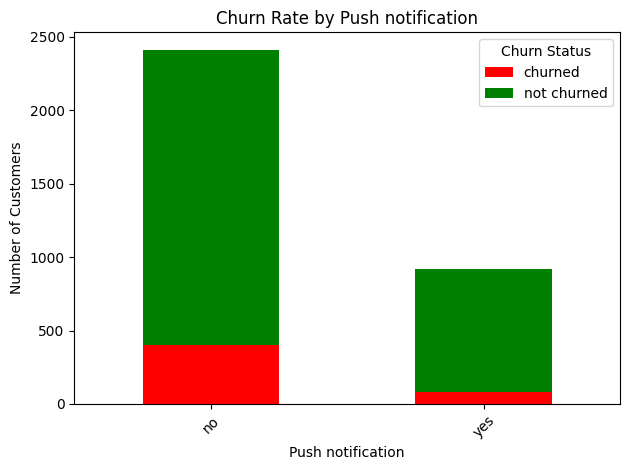

In [ ]:
# Assuming df is your DataFrame with 'location_code' and 'churn_cat'
# Group by 'location_code' and 'churn_cat', then count occurrences
churn_counts = df_copy.groupby(['push_status', 'churn_cat']).size().unstack()

# Create a bar plot
churn_counts.plot(kind='bar', stacked=True, color=['red', 'green'])

# Customize the plot
plt.title('Churn Rate by Push notification')
plt.ylabel('Number of Customers')
plt.xlabel('Push notification')
plt.xticks(rotation=45)
plt.legend(title='Churn Status')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
all = pd.crosstab(df_copy['churn_cat'],df_copy['push_status'],margins=True)['All']
pd.crosstab(df_copy['churn_cat'],df_copy['push_status']).divide(all,axis=0).dropna().loc['churned']

push_status
no     0.834369
yes    0.165631
Name: churned, dtype: float64

The majority of churned customers (83.4%) did not have push notifications enabled, while only 16.6% had push notifications turned on. This suggests that customers who do not receive push notifications are more likely to churn, potentially due to reduced engagement with the app or missing out on timely promotions and reminders. Enabling push notifications could be an effective retention strategy, as it may help keep customers engaged and informed about new offers or updates.

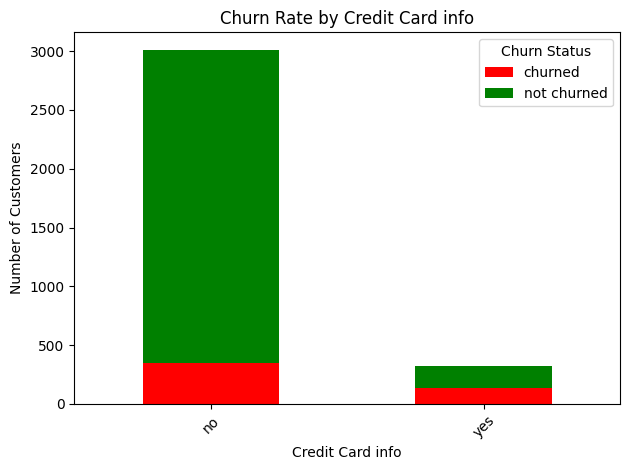

In [ ]:
churn_counts = df_copy.groupby(['credit_card_info_save', 'churn_cat']).size().unstack()

# Create a bar plot
churn_counts.plot(kind='bar', stacked=True, color=['red', 'green'])

# Customize the plot
plt.title('Churn Rate by Credit Card info')
plt.ylabel('Number of Customers')
plt.xlabel('Credit Card info')
plt.xticks(rotation=45)
plt.legend(title='Churn Status')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
all = pd.crosstab(df_copy['churn_cat'],df_copy['credit_card_info_save'],margins=True)['All']
pd.crosstab(df_copy['churn_cat'],df_copy['credit_card_info_save']).divide(all,axis=0).dropna().loc['churned']

credit_card_info_save
no     0.716356
yes    0.283644
Name: churned, dtype: float64

A significant portion of churned customers (71.6%) did not have their credit card information saved, while only 28.4% had saved their payment details. This suggests that customers who do not save their credit card information may face more friction during checkout, potentially leading to a higher likelihood of churn. Encouraging customers to save their payment information (by emphasizing security and convenience) could reduce churn by making the purchasing process smoother and more accessible.

### Overall Summary for the Analysis of Churn(Dependent Variable) vs Independent Variables :

The dataset is complete with no missing values, and the identified outliers are considered valid rather than errors, reflecting natural variations in e-commerce behavior. These outliers should be retained, as they may provide important insights into customer interactions.

The analysis reveals a moderate positive correlation between both desktop and app sessions and customer churn, suggesting that frequent users of these platforms may encounter issues leading to dissatisfaction. Interestingly, non-churned customers tend to have higher average order values and engage more with wishlists, indicating that greater engagement correlates with loyalty.

Churned customers, on the other hand, exhibit higher desktop usage but this alone does not correlate with retention, implying that the quality of engagement—such as personalized recommendations—could be more impactful. The data also highlights that most churned customers do not have push notifications enabled or saved credit card information, both of which could lead to reduced engagement and friction during checkout. Implementing strategies to enhance notification settings and encourage payment information storage could potentially improve customer retention rates.







# 9.3 Observations from plotting categorical data against Churn

- The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn
- Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
- Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.
    - This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.